In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [177]:
idx = 220

data_path = Path('/mnt/f/isee_dataset/12673/input/').glob('*.npz')
data_path = sorted(data_path)

label_path = Path('/mnt/f/isee_dataset/12673/label/').glob('*.npz')
label_path = sorted(label_path)

print(data_path[idx].name)
print(label_path[idx].name)

input_12673_20170906_021200.npz
label_12673_20170906_021200.npz


In [178]:
labels = np.load(label_path[idx])

In [179]:
labels.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f3b8db03520>)

In [180]:
b = labels['label']
b = b[:, :-1, :-1, :-1]
b = np.clip(b, -6000, 6000)
b.shape

(3, 512, 256, 256)

In [181]:
inputs = b[:, :, :, 0]
inputs.shape

(3, 512, 256)

In [182]:
print(inputs[0].max(), inputs[0].min())
print(inputs[1].max(), inputs[1].min())
print(inputs[2].max(), inputs[2].min())

1789.83 -3633.51
4016.59 -2427.55
3173.71 -3423.47


In [183]:
bx_norm = np.max(np.abs(inputs[0]))
by_norm = np.max(np.abs(inputs[1]))
bz_norm = np.max(np.abs(inputs[2]))

print(bx_norm, by_norm, bz_norm)

bx_norm = 2500
by_norm = 2500
bz_norm = 2500

3633.51 4016.59 3423.47


In [184]:
np.arange(1, 4*(b.shape[-1]), 4)

array([   1,    5,    9,   13,   17,   21,   25,   29,   33,   37,   41,
         45,   49,   53,   57,   61,   65,   69,   73,   77,   81,   85,
         89,   93,   97,  101,  105,  109,  113,  117,  121,  125,  129,
        133,  137,  141,  145,  149,  153,  157,  161,  165,  169,  173,
        177,  181,  185,  189,  193,  197,  201,  205,  209,  213,  217,
        221,  225,  229,  233,  237,  241,  245,  249,  253,  257,  261,
        265,  269,  273,  277,  281,  285,  289,  293,  297,  301,  305,
        309,  313,  317,  321,  325,  329,  333,  337,  341,  345,  349,
        353,  357,  361,  365,  369,  373,  377,  381,  385,  389,  393,
        397,  401,  405,  409,  413,  417,  421,  425,  429,  433,  437,
        441,  445,  449,  453,  457,  461,  465,  469,  473,  477,  481,
        485,  489,  493,  497,  501,  505,  509,  513,  517,  521,  525,
        529,  533,  537,  541,  545,  549,  553,  557,  561,  565,  569,
        573,  577,  581,  585,  589,  593,  597,  6

In [185]:
aa = np.arange(1, b.shape[-1]//8, 0.5)
bb = np.arange(b.shape[-1]//8, b.shape[-1]//4 + 1, 2)
cc = np.arange(b.shape[-1]//4 + 1, 2*b.shape[-1] + 260, 4)
# bb = 2*(np.arange(1, b.shape[-1] + 1)[b.shape[-1]//2:])
divi = np.concatenate([aa, bb, cc])
divi, divi.shape

(array([  1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,
          5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,
         10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,
         14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,
         19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,
         23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,
         28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,
         34. ,  36. ,  38. ,  40. ,  42. ,  44. ,  46. ,  48. ,  50. ,
         52. ,  54. ,  56. ,  58. ,  60. ,  62. ,  64. ,  65. ,  69. ,
         73. ,  77. ,  81. ,  85. ,  89. ,  93. ,  97. , 101. , 105. ,
        109. , 113. , 117. , 121. , 125. , 129. , 133. , 137. , 141. ,
        145. , 149. , 153. , 157. , 161. , 165. , 169. , 173. , 177. ,
        181. , 185. , 189. , 193. , 197. , 201. , 205. , 209. , 213. ,
        217. , 221. , 225. , 229. , 233. , 237. , 241. , 245. , 249. ,
      

In [186]:
# divi = np.arange(1, 2*(b.shape[-1]), 2)

In [187]:
bx_divisor = (bx_norm / divi).reshape(1, 1, -1).astype(np.float32)
by_divisor = (by_norm / divi).reshape(1, 1, -1).astype(np.float32)
bz_divisor = (bz_norm / divi).reshape(1, 1, -1).astype(np.float32)

In [188]:
bx = b[0]
by = b[1]
bz = b[2]

In [189]:
bx /= bx_divisor
by /= by_divisor
bz /= bz_divisor

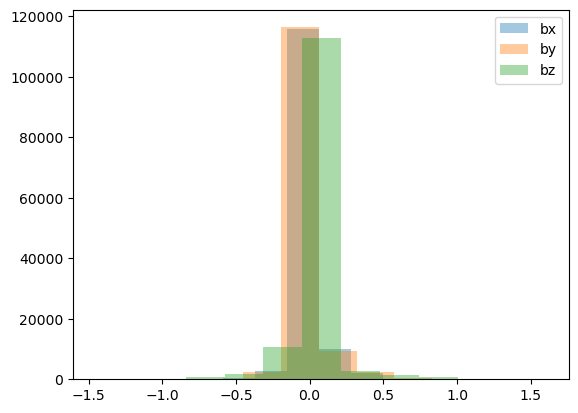

In [190]:
plt.hist(bx[:, :, 0].flatten(), alpha=0.4, label='bx')
plt.hist(by[:, :, 0].flatten(), alpha=0.4, label='by')
plt.hist(bz[:, :, 0].flatten(), alpha=0.4, label='bz')
plt.legend()
plt.show()

In [191]:
bx_min = np.min(bx, axis=(0, 1))
bx_max = np.max(bx, axis=(0, 1))

by_min = np.min(by, axis=(0, 1))
by_max = np.max(by, axis=(0, 1))

bz_min = np.min(bz, axis=(0, 1))
bz_max = np.max(bz, axis=(0, 1))

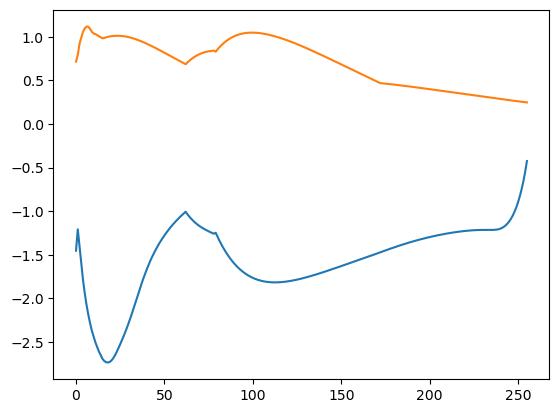

In [192]:
plt.plot(bx_min, label='bx_min')
plt.plot(bx_max, label='bx_max')
plt.show()

[]

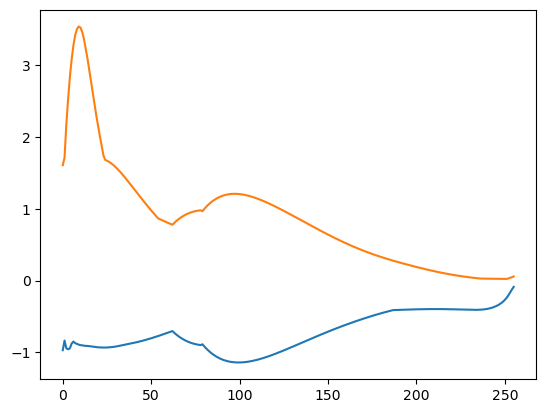

In [193]:
plt.plot(by_min, label='by_min')
plt.plot(by_max, label='by_max')
plt.plot()

[]

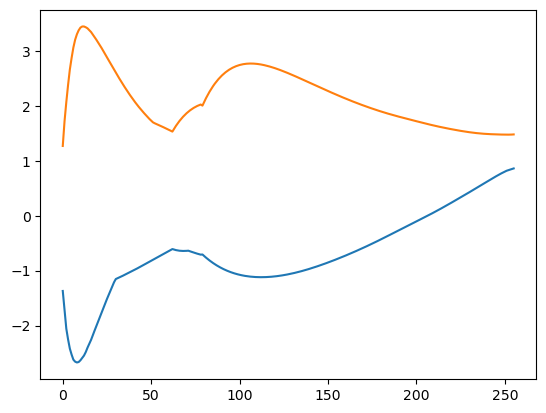

In [194]:
plt.plot(bz_min, label='bz_min')
plt.plot(bz_max, label='bz_max')
plt.plot()

In [ ]:
bx_mm =(bx - bx.min()) / (bx.max() - bx.min())
by_mm =(by - by.min()) / (by.max() - by.min())
bz_mm =(bz - bz.min()) / (bz.max() - bz.min())